<a href="https://colab.research.google.com/github/J0SAL/Labs/blob/main/SC-IT312/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install scikit-fuzzy

In [29]:
from skfuzzy import defuzzify
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [30]:
dirt = ctrl.Antecedent(np.arange(0, 100, 1), 'dirt')
grease = ctrl.Antecedent(np.arange(0, 100, 1), 'grease')
washtime = ctrl.Consequent(np.arange(0, 60, 1), label = 'washtime', defuzzify_method = 'mom')

#Triangular membership function used
dirt['small'] = fuzz.trimf(dirt.universe, [0,0,50])
dirt['medium'] = fuzz.trimf(dirt.universe, [0,50,100])
dirt['large'] = fuzz.trimf(dirt.universe, [50,100,100])

grease['zero'] = fuzz.trimf(grease.universe,[0,0,50])
grease['medium'] = fuzz.trimf(grease.universe,[0,50,100])
grease['large'] = fuzz.trimf(grease.universe,[50,100,100])

washtime['very_small'] = fuzz.trimf(washtime.universe, [0,0,10])
washtime['small'] = fuzz.trimf(washtime.universe, [0,10,25])
washtime['medium'] = fuzz.trimf(washtime.universe, [10,25,40])
washtime['large'] = fuzz.trimf(washtime.universe, [25,40,60])
washtime['very_large'] = fuzz.trimf(washtime.universe, [40,60,60])

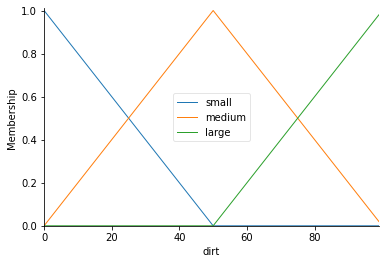

In [31]:
dirt.view()

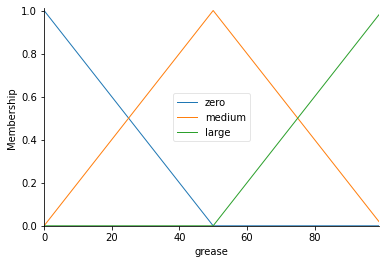

In [32]:
grease.view()

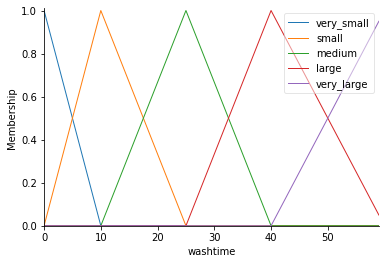

In [33]:
washtime.view()

**Rules**
1. Dirt[small] & Grease[Zero] ==> Washtime[Very Small]
2. Dirt[small] & Grease[Zero] ==> Washtime[Medium]
3. Dirt[small] & Grease[Zero] ==> Washtime[Large]
4. Dirt[medium] & Grease[Medium] ==> Washtime[Small]
5. Dirt[medium] & Grease[Medium] ==> Washtime[Medium]
6. Dirt[medium] & Grease[Medium] ==> Washtime[Large]
7. Dirt[large] & Grease[Large] ==> Washtime[Medium]
8. Dirt[large] & Grease[Large] ==> Washtime[Large]
9. Dirt[large] & Grease[Large] ==> Washtime[Very Large]

In [34]:
#rules
rule1 = ctrl.Rule(dirt['small'] & grease['zero'], washtime['very_small'])
rule2 = ctrl.Rule(dirt['small'] & grease['medium'], washtime['medium'])
rule3 = ctrl.Rule(dirt['small'] & grease['large'], washtime['large'])
rule4 = ctrl.Rule(dirt['medium'] & grease['zero'], washtime['very_small'])
rule5 = ctrl.Rule(dirt['medium'] & grease['medium'], washtime['medium'])
rule6 = ctrl.Rule(dirt['medium'] & grease['large'], washtime['large'])
rule7 = ctrl.Rule(dirt['large'] & grease['zero'], washtime['very_small'])
rule8 = ctrl.Rule(dirt['large'] & grease['medium'], washtime['medium'])
rule9 = ctrl.Rule(dirt['large'] & grease['large'], washtime['large'])

In [35]:
washtime_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [36]:
washtime_sim = ctrl.ControlSystemSimulation(washtime_ctrl)

In [37]:
# condition: Medium Dirt & Medium Grease ==> Medium Washtime (From Rules)

washtime_sim.input['dirt'] = 60
washtime_sim.input['grease'] = 70

washtime_sim.compute()

the washtime output by fuzzy system is 25.0 mins 


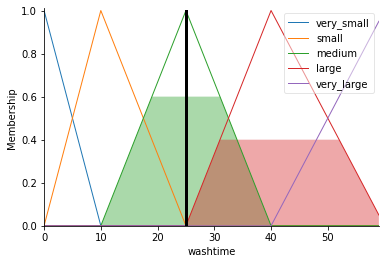

In [38]:
print("the washtime output by fuzzy system is {} mins ".format(washtime_sim.output['washtime']))
washtime.view(sim=washtime_sim)